In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [30]:
df = pd.read_excel('Final_Capstone_Spreadsheet.xlsx')

In [31]:
# choose relavent columns
df.columns 

Index(['Rank', 'Company Name ', 'Ticker Symbol', 'Country of Origin',
       'Company Age', 'Est. Market Capitalization', 'Total Liabilities',
       'D/E Ratio', 'R&D Expense 3rd Quarter 2021',
       'R&D Expense 3rd Quarter 2020', 'R&D Expense 3rd Quarter 2019',
       'R&D Expense 3rd Quarter 2018',
       'Number of Research Areas Covered by R&D Pipeline',
       'No. of Ongoing Phase 1 Clinical Trials',
       'No. of Ongoing Phase 2 Clinical Trials',
       'No. of Ongoing Phase 3 Clinical Trials', 'Filed', 'Total in Pipeline',
       'Total Approved Treatments on the Market in the U.S.A. ',
       'No. of Employees'],
      dtype='object')

In [32]:
df_model = df[['Rank', 'Company Name ', 'Ticker Symbol', 'Country of Origin',
       'Company Age', 'Est. Market Capitalization', 'Total Liabilities',
       'D/E Ratio', 'R&D Expense 3rd Quarter 2021',
       'R&D Expense 3rd Quarter 2020', 'R&D Expense 3rd Quarter 2019',
       'R&D Expense 3rd Quarter 2018',
       'Number of Research Areas Covered by R&D Pipeline',
       'No. of Ongoing Phase 1 Clinical Trials',
       'No. of Ongoing Phase 2 Clinical Trials',
       'No. of Ongoing Phase 3 Clinical Trials', 'Filed', 'Total in Pipeline',
       'Total Approved Treatments on the Market in the U.S.A. ',
       'No. of Employees']]

In [33]:
# get dummy data
df_dum = pd.get_dummies(df_model)

In [34]:
# train test splits
from sklearn.model_selection import train_test_split

X = df_dum.drop('Filed', axis = 1)
y = df_dum.Filed.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# multiple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary

C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001D1A95DB310>>

In [36]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3)

array([-11.2084359 , -18.49070447,  -4.78435171])

In [37]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-11.4944973641739

In [38]:
# lasso regression
lm_l = Lasso()
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8368088869833836, tolerance: 0.014760000000000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9109485910318, tolerance: 0.0858909090909091
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.515220882719826, tolerance: 0.0800909090909091
  model = cd_fast.enet_coordinate_descent(


-7.572833039950716

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8368088869833836, tolerance: 0.014760000000000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9109485910318, tolerance: 0.0858909090909091
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.515220882719826, tolerance: 0.0800909090909091
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: O

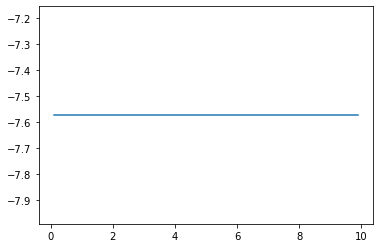

In [39]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3)))
    
plt.plot(alpha, error)

In [40]:
err = tuple(zip(alpha, error))

In [41]:
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.1,-7.572833
1,0.2,-7.572833
2,0.3,-7.572833
3,0.4,-7.572833
4,0.5,-7.572833
...,...,...
94,9.5,-7.572833
95,9.6,-7.572833
96,9.7,-7.572833
97,9.8,-7.572833


In [44]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))


-3.695222222222222

In [46]:
# tune models GridsearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse', 'mae'), 'max_features':('auto', 'sqrt', 'log2')}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [47]:
gs.best_score_

-3.532222222222222

In [48]:
gs.best_estimator_

RandomForestRegressor(n_estimators=280)

In [ ]:
# test ensembles